## Iris Dataset Classification using K-Nearest Neighbors with Dimension Reduction

kNN을 이용하여 PCA가 적용된 iris 데이터셋 분류

<span style="color: #2D3748; background-color:#fff5b1;">PCA를 적용하여 feature의 수를 2개와 3개로 구성한 후 kNN을 이용하여 실험한 결과 정확도 측면에서는 PCA를 적용하지 않은 방법과 비슷하지만 분류 시간의 경우 PCA를 적용하지 않은 경우 시간이 증가하였다.</span>

In [206]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [207]:
comparison_train = []
comparison_test = []
comparison_time = []

## kNN with PCA feature 3

In [208]:
iris = load_iris()

pca = PCA(n_components=3)
features = pca.fit(iris.data).transform(iris.data)

feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

print(features.shape)

(150, 3)


In [209]:
avg_training_acc = []
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    train_score = knn.score(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_training_acc.append(train_score)
    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()
print("Training set score: %f" % np.array(avg_training_acc).mean())
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_train.append(np.array(avg_training_acc).mean())
comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  120  / test size :  30

Training set score: 1.000000
Test set score: 0.953333
Training Time : 0.0047 sec


## kNN with PCA feature 2

In [210]:
pca = PCA(n_components=2)
features = pca.fit(iris.data).transform(iris.data)

feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

print(features.shape)

(150, 2)


In [211]:
avg_training_acc = []
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    train_score = knn.score(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_training_acc.append(train_score)
    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()
print("Training set score: %f" % np.array(avg_training_acc).mean())
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_train.append(np.array(avg_training_acc).mean())
comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  120  / test size :  30

Training set score: 1.000000
Test set score: 0.960000
Training Time : 0.0048 sec


## K-Nearest Neighbor

In [212]:
iris = load_iris()

features = iris.data
feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

In [213]:
avg_training_acc = []
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    train_score = knn.score(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_training_acc.append(train_score)
    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()
print("Training set score: %f" % np.array(avg_training_acc).mean())
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_train.append(np.array(avg_training_acc).mean())
comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  120  / test size :  30

Training set score: 1.000000
Test set score: 0.950000
Training Time : 0.0052 sec


### Method Comparison

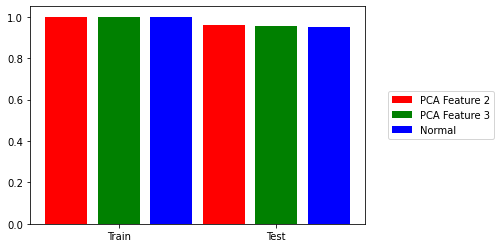

In [214]:
xticks = ["Train", "Test"]
method = ["PCA Feature 2", "PCA Feature 3", "Normal"]

x1 = [1,4]
data1 = [comparison_train[1], comparison_test[1]]
plt.bar(x1, data1, color='r')

x2 = [2,5]
data2 = [comparison_train[0], comparison_test[0]]
plt.bar(x2, data2, color='g')

x3 = [3,6]
data3 = [comparison_train[2], comparison_test[2]]
plt.bar(x3, data3, color='b')

plt.xticks(x2, xticks)
plt.legend(method, loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.show()

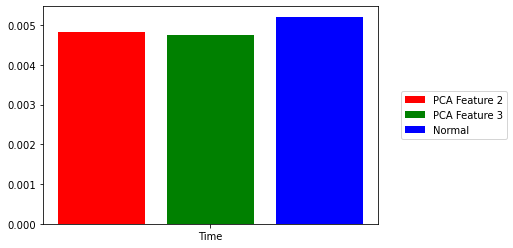

In [215]:
xticks = ["Time"]
method = ["PCA Feature 2", "PCA Feature 3", "Normal"]

x1 = [1]
data1 = [comparison_time[1]]
plt.bar(x1, data1, color='r')

x2 = [2]
data2 = [comparison_time[0]]
plt.bar(x2, data2, color='g')

x3 = [3]
data3 = [comparison_time[2]]
plt.bar(x3, data3, color='b')

plt.xticks(x2, xticks)
plt.legend(method, loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.show()